<a href="https://colab.research.google.com/github/bru-na-c/cancer/blob/main/breast_cancer_coimbra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

# source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra
# paper 1: https://bmccancer.biomedcentral.com/track/pdf/10.1186/s12885-017-3877-1.pdf

filename = "dataR2.csv"

In [ ]:
data = pd.read_csv(filename)
data = data.rename(columns={"Age": "Idade", "BMI": "IMC", "Glucose": "Glicose", 
                            "Insulin": "Insulina", "HOMA": "HOMA", "Leptin": "Leptina", 
                            "Adiponectin": "Adiponectina", "Resistin": "Resistina", 
                            "MCP.1": "MCP-1", "Classification": "Classificação"})

data['Classificação'] -= 1

attributes = list(data.columns.values)[:-1]

data

,Idade,IMC,Glicose,Insulina,HOMA,Leptina,Adiponectina,Resistina,MCP-1,Classificação
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,1
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,1
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,1
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,1


In [ ]:
data.describe()

,Idade,IMC,Glicose,Insulina,HOMA,Leptina,Adiponectina,Resistina,MCP-1,Classificação
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,0.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,0.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,0.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,1.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,1.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,1.000000


In [ ]:
for c in data.columns.values:
    print(c, data[c].kurtosis())


Idade -0.9830417135998295
IMC -0.922927309213613
Glicose 8.987879004285988
Insulina 7.502048765027892
HOMA 17.59078100833249
Leptina 1.434077471723961
Adiponectina 3.9293921696803014
Resistina 8.909293994504166
MCP-1 2.581581625048003
Classificação -1.9902043549138342


In [ ]:
data2 = data.drop(columns=['Classificação'])
data2.corr().style.background_gradient(cmap='Blues')

,Idade,IMC,Glicose,Insulina,HOMA,Leptina,Adiponectina,Resistina,MCP-1
Idade,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462
IMC,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038
Glicose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879
Insulina,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529
Leptina,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009
Adiponectina,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694
Resistina,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474
MCP-1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000


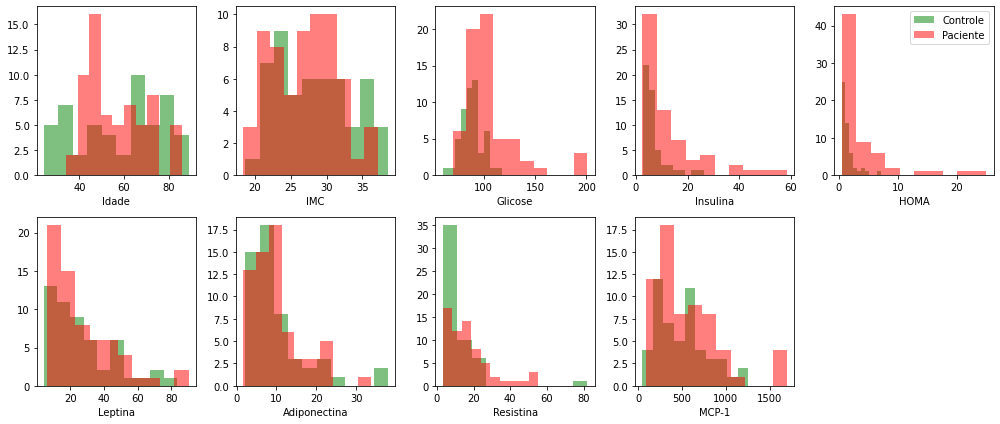

In [ ]:
# data2.hist(figsize=(12,8), grid=False, bins=10)

import seaborn as sns
def plot_hist(df):

    np_data = df.to_numpy()
    X = np_data[:, :-1]
    y = np_data[:, -1]

    fig = plt.figure(figsize=(14,6))
    for j in range(X.shape[1]):
        ax = plt.subplot(2, 5, j+1)
        plt.hist(X[y == 0, j], alpha=0.5, label='Controle', color='g')
        plt.hist(X[y == 1, j], alpha=0.5, label='Paciente', color='r')
        plt.xlabel(attributes[j])
        if j == 4:
            plt.legend(loc='upper right')
    fig.subplots_adjust(wspace=0, hspace=0)
    plt.tight_layout()
    plt.savefig('hist.png')

plot_hist(data)

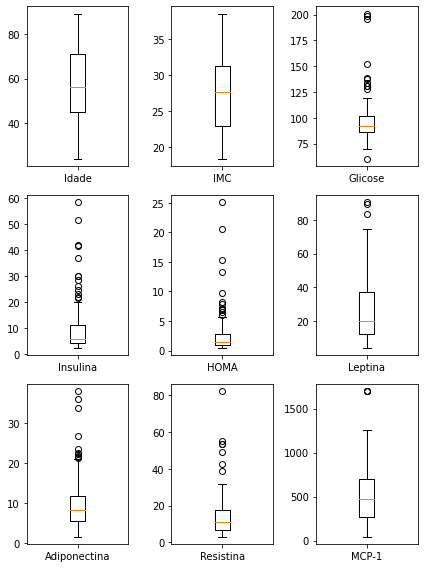

In [ ]:
def plot_boxplot(df):
  fig = plt.figure(figsize=(6,8))
  for e, c in enumerate(df.columns.values):
      ax = plt.subplot(3, 3, e+1)
      plt.boxplot(df[c])
      ax.set_xticklabels( (c,) )
  fig.subplots_adjust(wspace=0, hspace=0)
  plt.tight_layout()

plot_boxplot(data2)

In [ ]:
# preprocessamento : analise e remoção dos outliers

def preprocess_outliers(data, attributes, fs=None, is_train_set=True):

    results = {}

    if is_train_set:
        data_sorted = np.copy(data)
        data_sorted.sort(axis=0)
    
        n = data_sorted.shape[0]
        q1_idx = int(0.25 * n + 0.5) 
        q3_idx = int(0.75 * n + 0.5)

        fs = []

    for j in range(len(attributes)):
  
        if is_train_set:
            q1 = data_sorted[q1_idx, j]
            q3 = data_sorted[q3_idx, j]

            # Cálculo da cerca inferior e superior
            iqr = q3 - q1
            lf = q1 - iqr * 1.5
            uf = q3 + iqr * 1.5
            
            # Cálculo da cerca mais próxima
            first_lf = data_sorted[data_sorted[:, j] >= lf, j][0]
            last_uf = data_sorted[data_sorted[:, j] <= uf, j][-1]

            fs.append((lf, uf, first_lf, last_uf))
        else:
            lf, uf, first_lf, last_uf = fs[j]

        results[attributes[j]] = (data[:, j] > uf).sum() + (data[:, j] < lf).sum()

        # Substituindo os outliers para a cerca mais próxima
        data[data[:, j] < lf, j] = first_lf
        data[data[:, j] > uf, j] = last_uf

    if is_train_set:
        return data, fs, results
    else:
        return data, results


In [ ]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def run_models(X_train, X_train_pc, y_train, X_test, X_test_pc, y_test, results):

    def _run_model(clf, X_train, y_train, X_test, y_test, model_name, data_type, results_):

        clf.fit(X_train, y_train)
        y_test_prime = clf.predict(X_test)

        test_acc = accuracy_score(y_test, y_test_prime)
        assert (y_test_prime == y_test).sum() / y_test.shape[0] == test_acc

        test_precision = precision_score(y_test, y_test_prime)    
        test_recall = recall_score(y_test, y_test_prime)
        test_f1 = f1_score(y_test, y_test_prime)

        if data_type not in results_[model_name]:
            results_[model_name][data_type] = {
                'Acurácia': [test_acc],
                'Precisão': [test_precision],
                'Revocação': [test_recall],
                'F1-score': [test_f1]
            }
        else:
            results_[model_name][data_type]['Acurácia'].append(test_acc)
            results_[model_name][data_type]['Precisão'].append(test_precision)
            results_[model_name][data_type]['Revocação'].append(test_recall)
            results_[model_name][data_type]['F1-score'].append(test_f1)

    models = {
        'GradientBoostingClassifier_50_3': lambda: GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=1),
        'GradientBoostingClassifier_100_3': lambda: GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=1),
        'GradientBoostingClassifier_150_3': lambda: GradientBoostingClassifier(n_estimators=150, max_depth=3, random_state=1),
        'GradientBoostingClassifier_200_3': lambda: GradientBoostingClassifier(n_estimators=200, max_depth=3, random_state=1),
        'GradientBoostingClassifier_50_4': lambda: GradientBoostingClassifier(n_estimators=50, max_depth=4, random_state=1),
        'GradientBoostingClassifier_100_4': lambda: GradientBoostingClassifier(n_estimators=100, max_depth=4, random_state=1),
        'GradientBoostingClassifier_150_4': lambda: GradientBoostingClassifier(n_estimators=150, max_depth=4, random_state=1),
        'GradientBoostingClassifier_200_4': lambda: GradientBoostingClassifier(n_estimators=200, max_depth=4, random_state=1),
        'MLP_relu_adam_100': lambda: MLPClassifier(activation='relu', solver='adam', hidden_layer_sizes=(100,), random_state=1, max_iter=200),
        'MLP_relu_adam_100_50': lambda: MLPClassifier(activation='relu', solver='adam', hidden_layer_sizes=(100, 50), random_state=1, max_iter=200),
        'MLP_relu_adam_100_100': lambda: MLPClassifier(activation='relu', solver='adam', hidden_layer_sizes=(100, 100), random_state=1, max_iter=200),
        'MLP_logistic_adam_100': lambda: MLPClassifier(activation='logistic', solver='adam', hidden_layer_sizes=(100,), random_state=1, max_iter=200),
        'MLP_logistic_adam_100_50': lambda: MLPClassifier(activation='logistic', solver='adam', hidden_layer_sizes=(100, 50), random_state=1, max_iter=200),
        'MLP_logistic_adam_100_100': lambda: MLPClassifier(activation='logistic', solver='adam', hidden_layer_sizes=(100, 100), random_state=1, max_iter=200),
        'MLP_relu_sgd_100': lambda: MLPClassifier(activation='relu', solver='sgd', hidden_layer_sizes=(100,), random_state=1, max_iter=200),
        'MLP_relu_sgd_100_50': lambda: MLPClassifier(activation='relu', solver='sgd', hidden_layer_sizes=(100, 50), random_state=1, max_iter=200),
        'MLP_relu_sgd_100_100': lambda: MLPClassifier(activation='relu', solver='sgd', hidden_layer_sizes=(100, 100), random_state=1, max_iter=200),
        'MLP_logistic_sgd_100': lambda: MLPClassifier(activation='logistic', solver='sgd', hidden_layer_sizes=(100,), random_state=1, max_iter=200),
        'MLP_logistic_sgd_100_50': lambda: MLPClassifier(activation='logistic', solver='sgd', hidden_layer_sizes=(100, 50), random_state=1, max_iter=200),
        'MLP_logistic_sgd_100_100': lambda: MLPClassifier(activation='logistic', solver='sgd', hidden_layer_sizes=(100, 100), random_state=1, max_iter=200)
    }

    for model_name, model in models.items():
        if not model_name in results:
            results[model_name] = {}
        _run_model(model(), X_train, y_train, X_test, y_test, model_name, 'Padrão', results)
        _run_model(model(), X_train_pc, y_train, X_test_pc, y_test, model_name, 'Componentes Principais', results)



Fold k = 1 TRAIN length: 92 TEST length: 24


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi


Fold k = 2 TRAIN length: 93 TEST length: 23


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi


Fold k = 3 TRAIN length: 93 TEST length: 23


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi


Fold k = 4 TRAIN length: 93 TEST length: 23


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi


Fold k = 5 TRAIN length: 93 TEST length: 23


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

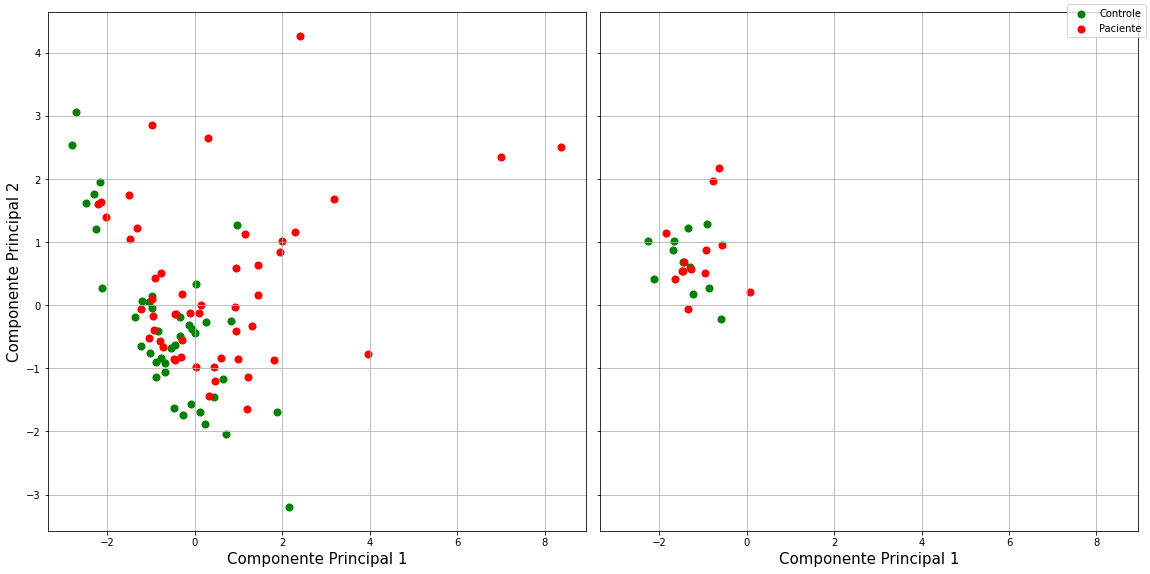

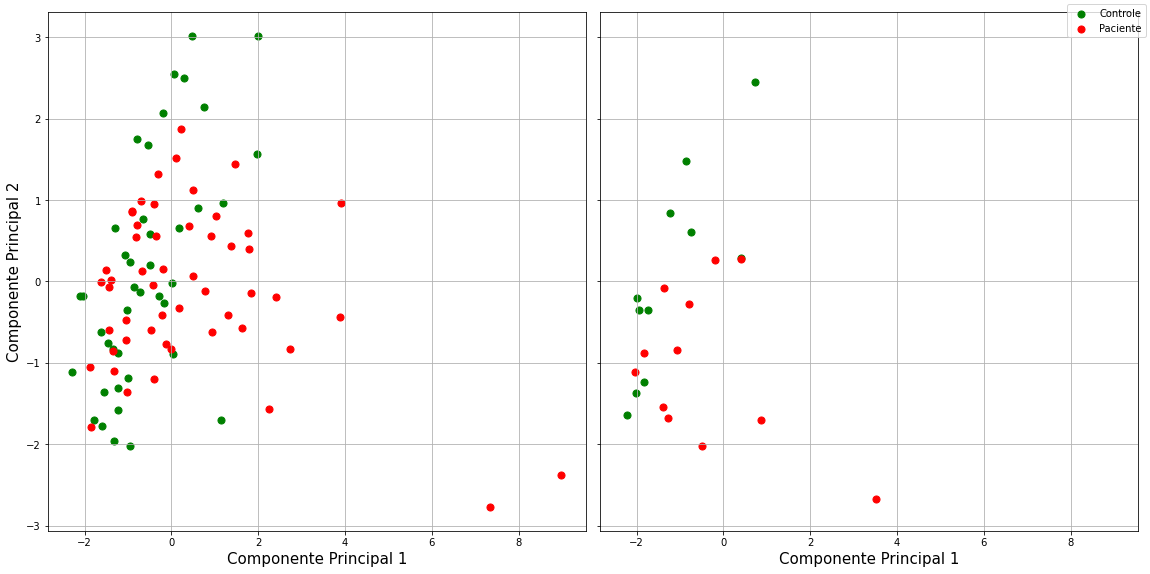

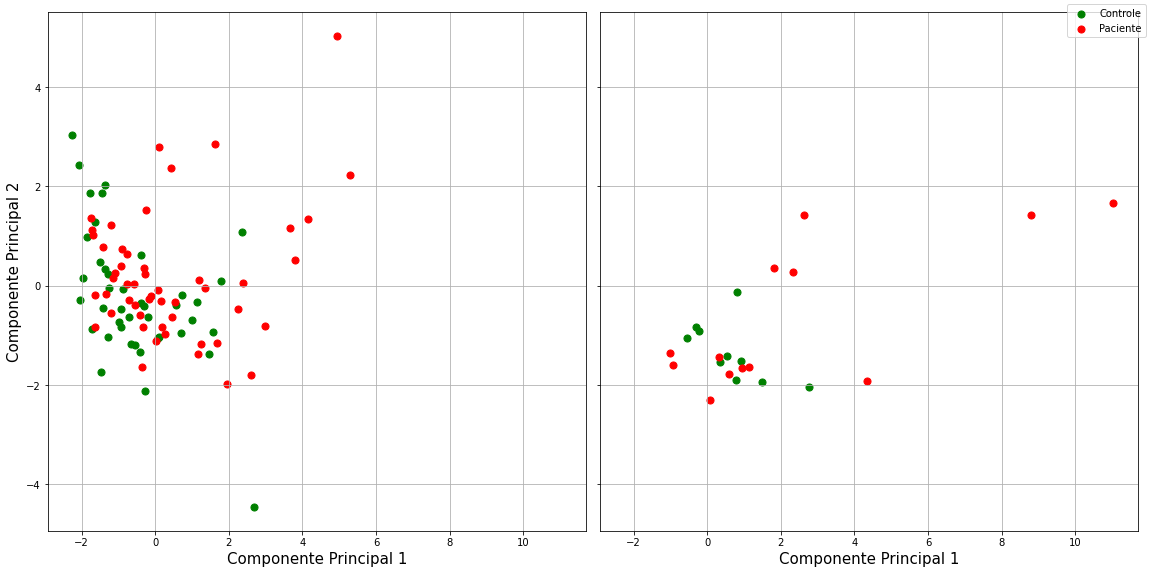

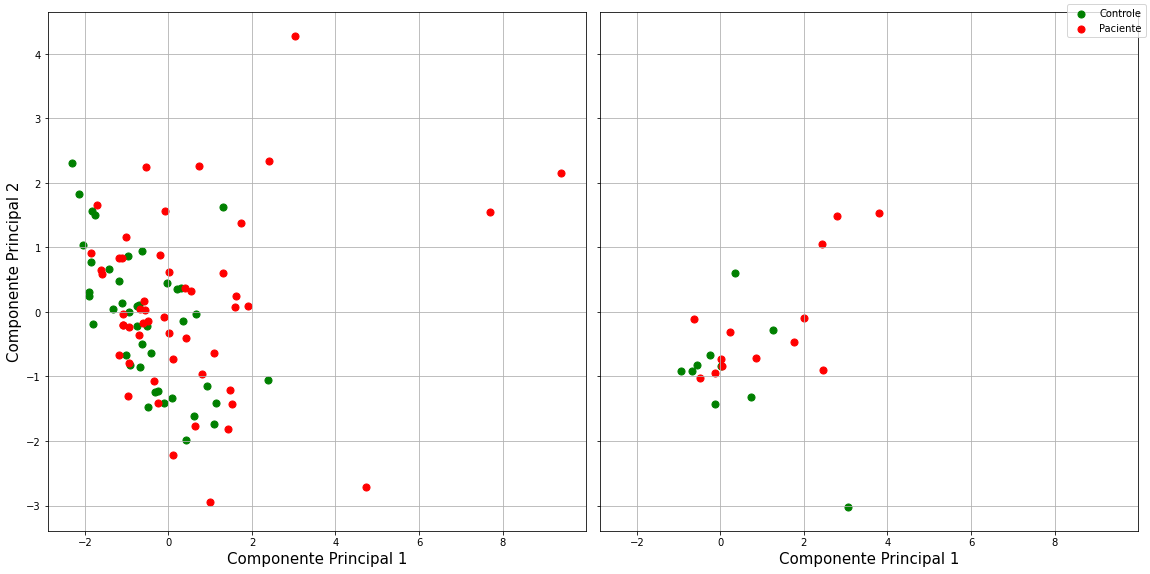

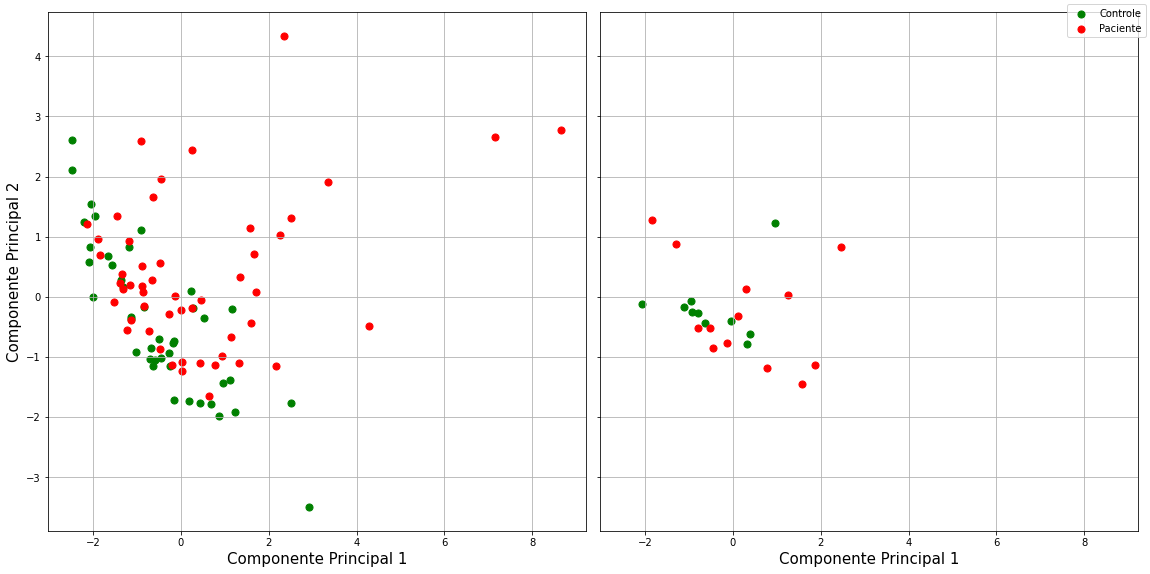

In [ ]:
# pipeline
# para cada fold
# o fold de treino:
## contar outliers -> apresentar em uma tabela com cada fold
## remover outliers salvando a cerca maxima e inferior
## normalizar max min -> salvar max e min
# o fold de teste 
## contar outliers com base na cerca maxima e minima do fold de treino
## remover os outliers com base na cerca de treino
## normalizar usando o max e min do treino
#

from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from google.colab import files
from sklearn import preprocessing

np_data = data.to_numpy()
X = np_data[:, :-1]
y = np_data[:, -1]

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

outliers_results = []
models_results = {}
consider_outliers = False # consider means process (remove) outliers
for e, (train_index, test_index) in enumerate(skf.split(X, y)):

    print(f"\nFold k = {e+1}", "TRAIN length:", len(train_index), "TEST length:", len(test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    if consider_outliers:
        X_train, fs, n_train_outliers = preprocess_outliers(X_train, attributes, is_train_set=True)
        X_test, n_test_outliers = preprocess_outliers(X_test, attributes, fs, is_train_set=False)
        outliers_results.append({'Treino': n_train_outliers, 'Teste': n_test_outliers})

    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    

    # Begin : feature selection
    pca = PCA(n_components=2)
    pca.fit(X_train)
    X_train_pc = pca.transform(X_train)
    X_test_pc = pca.transform(X_test)

    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize = (16,8))
    ax1.set_xlabel('Componente Principal 1', fontsize = 15)
    ax1.set_ylabel('Componente Principal 2', fontsize = 15)
    ax1.scatter(X_train_pc[y_train == 0, 0], X_train_pc[y_train == 0, 1], c='g', s=50)
    ax1.scatter(X_train_pc[y_train == 1, 0], X_train_pc[y_train == 1, 1], c='r', s=50)
    ax1.grid()

    ax2.set_xlabel('Componente Principal 1', fontsize = 15)
    ax2.scatter(X_test_pc[y_test == 0, 0], X_test_pc[y_test == 0, 1], c='g', s=50)
    ax2.scatter(X_test_pc[y_test == 1, 0], X_test_pc[y_test == 1, 1], c='r', s=50)
    ax2.grid()

    fig.legend(['Controle', 'Paciente'])

    plt.tight_layout()
    plt.savefig(f"pc_fold_{e+1}.png")
    # files.download(f"pc_fold_{e+1}.png") 
    # End : feature selection

    run_models(X_train, X_train_pc, y_train, X_test, X_test_pc, y_test, models_results)


In [ ]:
print("Modelo & Acurácia & Precisão & Revocação & F1-score & Acurácia & Precisão & Revocação & F1-score\\\\")
for model_name, d in models_results.items():
    print("{} & {:.2f}$\pm${:.2f} & {:.2f}$\pm${:.2f} & {:.2f}$\pm${:.2f} & {:.2f}$\pm${:.2f} & {:.2f}$\pm${:.2f} & {:.2f}$\pm${:.2f} & {:.2f}$\pm${:.2f} & {:.2f}$\pm${:.2f}\\\\".format(model_name, 
                                                            np.mean(d['Padrão']['Acurácia']), np.std(d['Padrão']['Acurácia']), 
                                                            np.mean(d['Padrão']['Precisão']), np.std(d['Padrão']['Precisão']), 
                                                            np.mean(d['Padrão']['Revocação']), np.std(d['Padrão']['Revocação']), 
                                                            np.mean(d['Padrão']['F1-score']), np.std(d['Padrão']['F1-score']),
                                                            np.mean(d['Componentes Principais']['Acurácia']), np.std(d['Componentes Principais']['Acurácia']), 
                                                            np.mean(d['Componentes Principais']['Precisão']), np.std(d['Componentes Principais']['Precisão']), 
                                                            np.mean(d['Componentes Principais']['Revocação']), np.std(d['Componentes Principais']['Revocação']), 
                                                            np.mean(d['Componentes Principais']['F1-score']), np.std(d['Componentes Principais']['F1-score'])))
    




Modelo & Acurácia & Precisão & Revocação & F1-score & Acurácia & Precisão & Revocação & F1-score\\
GradientBoostingClassifier_50_3 & 0.73$\pm$0.09 & 0.73$\pm$0.03 & 0.80$\pm$0.18 & 0.76$\pm$0.10 & 0.59$\pm$0.07 & 0.60$\pm$0.04 & 0.73$\pm$0.20 & 0.65$\pm$0.10\\
GradientBoostingClassifier_100_3 & 0.72$\pm$0.12 & 0.71$\pm$0.07 & 0.80$\pm$0.20 & 0.74$\pm$0.13 & 0.59$\pm$0.07 & 0.61$\pm$0.03 & 0.72$\pm$0.21 & 0.65$\pm$0.10\\
GradientBoostingClassifier_150_3 & 0.75$\pm$0.11 & 0.76$\pm$0.06 & 0.80$\pm$0.20 & 0.77$\pm$0.12 & 0.61$\pm$0.08 & 0.63$\pm$0.03 & 0.70$\pm$0.22 & 0.65$\pm$0.11\\
GradientBoostingClassifier_200_3 & 0.74$\pm$0.12 & 0.74$\pm$0.07 & 0.80$\pm$0.20 & 0.76$\pm$0.13 & 0.59$\pm$0.10 & 0.61$\pm$0.05 & 0.69$\pm$0.24 & 0.63$\pm$0.13\\
GradientBoostingClassifier_50_4 & 0.71$\pm$0.13 & 0.71$\pm$0.10 & 0.80$\pm$0.18 & 0.74$\pm$0.12 & 0.58$\pm$0.09 & 0.60$\pm$0.05 & 0.68$\pm$0.22 & 0.62$\pm$0.12\\
GradientBoostingClassifier_100_4 & 0.72$\pm$0.12 & 0.73$\pm$0.06 & 0.78$\pm$0.20 & 0.75$

In [ ]:
if consider_outliers:
    print("Atributo & Treino & Teste & Treino & Teste & Treino & Teste & Treino & Teste & Treino & Teste\\\\")
    for a in attributes:
        items = [o[t][a] for o in outliers_results for t in ['Treino', 'Teste']]
        print("{} & {} & {} & {} & {} & {} & {} & {} & {} & {} & {}\\\\".format(a, *items))

In [ ]:
# best models
from sklearn.model_selection import train_test_split

# # Separar em treino e teste
y_column = 'Classificação'
y = data[y_column]
X = data[[c for c in data.columns if c != y_column]]

y = y.to_numpy()
X = X.to_numpy()

p = 0.2

def run_model(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_test_prime = clf.predict(X_test)

    test_acc = accuracy_score(y_test, y_test_prime)
    assert (y_test_prime == y_test).sum() / y_test.shape[0] == test_acc

    test_precision = precision_score(y_test, y_test_prime)    
    test_recall = recall_score(y_test, y_test_prime)
    test_f1 = f1_score(y_test, y_test_prime)

    return {'y_prime': y_test_prime, 'acc': test_acc, 'precision': test_precision, 'recall': test_recall, 'f1': test_f1}


results = {'xgb': [], 'mlp': []}

consider_outliers = False


for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p, stratify=y, random_state=i)

    if consider_outliers:
        X_train, fs, n_train_outliers = preprocess_outliers(X_train, attributes, is_train_set=True)
        X_test, n_test_outliers = preprocess_outliers(X_test, attributes, fs, is_train_set=False)

    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    if consider_outliers:
        results['xgb'].append(run_model(GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=i), X_train, y_train, X_test, y_test))
        results['mlp'].append(run_model(MLPClassifier(activation='relu', solver='adam', hidden_layer_sizes=(100, 100), random_state=i, max_iter=200), X_train, y_train, X_test, y_test))
    else:
        results['xgb'].append(run_model(GradientBoostingClassifier(n_estimators=150, max_depth=3, random_state=i), X_train, y_train, X_test, y_test))
        results['mlp'].append(run_model(MLPClassifier(activation='relu', solver='adam', hidden_layer_sizes=(100,), random_state=i, max_iter=200), X_train, y_train, X_test, y_test))


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

In [ ]:
for x in ['acc', 'precision', 'recall', 'f1']:
    print(x)
    xgb = [results['xgb'][i][x] for i in range(100)]
    mlp = [results['mlp'][i][x] for i in range(100)]
    print(np.mean(xgb), np.std(xgb))
    print(np.mean(mlp), np.std(mlp))
    print()

acc
0.7383333333333333 0.07707319753181244
0.7416666666666666 0.08143675119038359

precision
0.7437394443791502 0.08330204340236308
0.7795396727455551 0.0924442187556381

recall
0.8061538461538461 0.09939461726284982
0.743076923076923 0.12270135004055639

f1
0.7688833609987106 0.06824993925858328
0.753809873308954 0.08605868496936715

